## Dataset
The dataset were found from Kaggle, you check it out from [here](https://www.kaggle.com/airbnb/boston)

### Context

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Boston, MA.

### Content

The following Airbnb activity is included in this Boston dataset:

- Listings, including full descriptions and average review score
- Reviews, including unique id for each reviewer and detailed comments
- Calendar, including listing id and the price and availability for that day

We have three differt files 
* calendar data: home availability data from September 2016 to September 2017.
* listing data: home information data from January 2016 to January 2017 on 3,818 homes.
* reviews data: house reviews between June 2009 and January 2016.

## Project Steps

in the project there are steps that faced in to preform the solution whcih are:

* Business Understanding    
    created questions that need answers by the business.
* Data Understanding    
    checks of the avaliable data understanding what does it contains.
* Data Preparation      
    cleaning the data to be able to asnwer the questions in the first phase.
* Evaluation    
    prefrom the solution that answer the question.


## Questions To Answer

This notebook will answer three differnt type of problems which are:
- What is the average prices of the properties?
- What is the business growth?
- What is the total score rate of the reviews per neighborhood in boston?

In [53]:
# importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


%matplotlib inline


In [4]:
# make the rows and columns withut limit
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#### Access dataset from the CSV files

In [5]:
reviews = pd.read_csv('Dataset/reviews.csv')
listings = pd.read_csv('Dataset/listings.csv')
calendar = pd.read_csv('Dataset/calendar.csv')

### Exploring Data

In [6]:
print('Reviews: ')
print(reviews.info(),'\n\n\n')
print(reviews.shape,'\n\n\n')
reviews.head()

Reviews: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB
None 



(68275, 6) 





,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [7]:
print('Listings: ')
print(listings.info(),'\n\n\n')
print(listings.shape,'\n\n\n')
listings.head()

Listings: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [8]:
listings.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3585.0,8.440875e+06,4.500787e+06,3.353000e+03,4.679319e+06,8.577620e+06,1.278953e+07,1.493346e+07
scrape_id,3585.0,2.016091e+13,8.516813e-01,2.016091e+13,2.016091e+13,2.016091e+13,2.016091e+13,2.016091e+13
host_id,3585.0,2.492311e+07,2.292781e+07,4.240000e+03,6.103425e+06,1.928100e+07,3.622147e+07,9.385411e+07
host_listings_count,3585.0,5.890237e+01,1.711197e+02,0.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00,7.490000e+02
host_total_listings_count,3585.0,5.890237e+01,1.711197e+02,0.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00,7.490000e+02
neighbourhood_group_cleansed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,3585.0,4.234003e+01,2.440255e-02,4.223594e+01,4.232999e+01,4.234520e+01,4.235469e+01,4.238998e+01
longitude,3585.0,-7.108482e+01,3.156464e-02,-7.117179e+01,-7.110508e+01,-7.107843e+01,-7.106215e+01,-7.100010e+01
accommodates,3585.0,3.041283e+00,1.778929e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,3571.0,1.221647e+00,5.014871e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00


In [9]:
print('Calnedar: ')
print(calendar.info(),'\n\n\n')
print('the shape is:', calendar.shape,'\n\n\n')
calendar.head()

Calnedar: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB
None 



the shape is: (1308890, 4) 





,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


After knowing what kind of data that manipulating with, know with each question will prepare the data as it want to be, after that visualize them. 

### String With Q1


In [10]:
# convert the price from str to float to be able to calculate it later
listings.price = listings.price.replace({'[\$,]':''}, regex=True).astype(float)
listings.weekly_price = listings.weekly_price.replace({'[\$,]':''}, regex=True).astype(float)
listings.monthly_price = listings.monthly_price.replace({'[\$,]':''}, regex=True).astype(float)

In [11]:
listings.property_type.unique()

array(['House', 'Apartment', 'Condominium', 'Villa', 'Bed & Breakfast',
       'Townhouse', 'Entire Floor', 'Loft', 'Guesthouse', 'Boat', 'Dorm',
       'Other', nan, 'Camper/RV'], dtype=object)

In [12]:

groupedByProperty_type = listings.groupby('property_type').aggregate(['mean', 'count'])
names = [ 'Apartment', 'Bed & Breakfast', 'Boat','Camper/RV','Condominium','Dorm',
        'Entire Floor', 'Guesthouse','House','Loft',   
       'Other','Townhouse','Villa',]
groupedByProperty_type.price

,mean,count
property_type,,
Apartment,181.966692,2612
Bed & Breakfast,129.365854,41
Boat,268.833333,12
Camper/RV,60.000000,1
Condominium,190.246753,231
Dorm,62.500000,2
Entire Floor,122.000000,4
Guesthouse,289.000000,1
House,131.599644,562


<AxesSubplot:xlabel='property_type'>

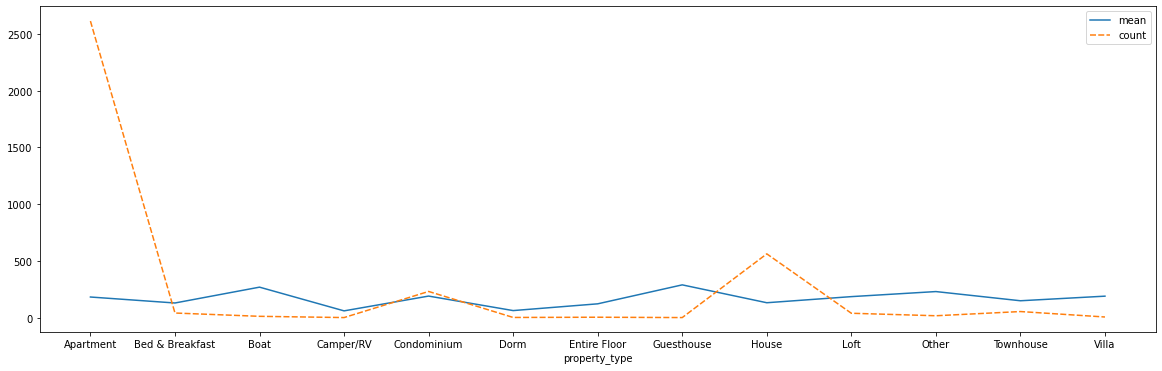

In [15]:
f, ax = plt.subplots(figsize=(20, 6))
sns.lineplot(data=groupedByProperty_type.price)

<AxesSubplot:xlabel='property_type'>

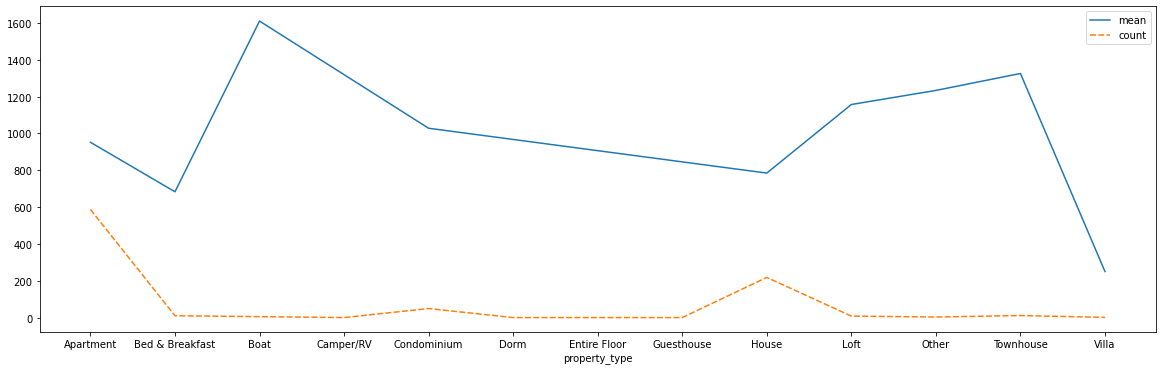

In [16]:
f, ax = plt.subplots(figsize=(20, 6))
sns.lineplot(data=groupedByProperty_type.weekly_price)

<AxesSubplot:xlabel='property_type'>

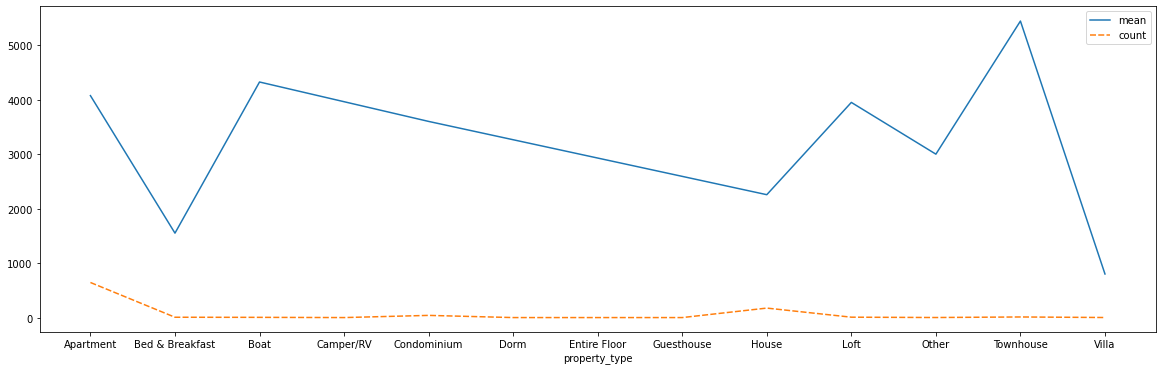

In [17]:
f, ax = plt.subplots(figsize=(20, 6))
sns.lineplot(data=groupedByProperty_type.monthly_price)

### Q2

The business growth has multiple factors to major, so i calculate the joince of hosts and how the growth of it then the same with the neighbourhoods 

In [46]:
hostsJoince = listings.groupby('host_since').count()[['id']]
hostsJoince = hostsJoince.rename({'id':'House number'},axis='columns')
hostsJoince['Total houses'] = hostsJoince['House number'].cumsum()
hostsJoince.head()

,House number,Total houses
host_since,,
2008-11-11,2,2
2008-12-03,1,3
2009-02-16,1,4
2009-02-17,1,5
2009-02-19,6,11


<AxesSubplot:xlabel='host_since'>

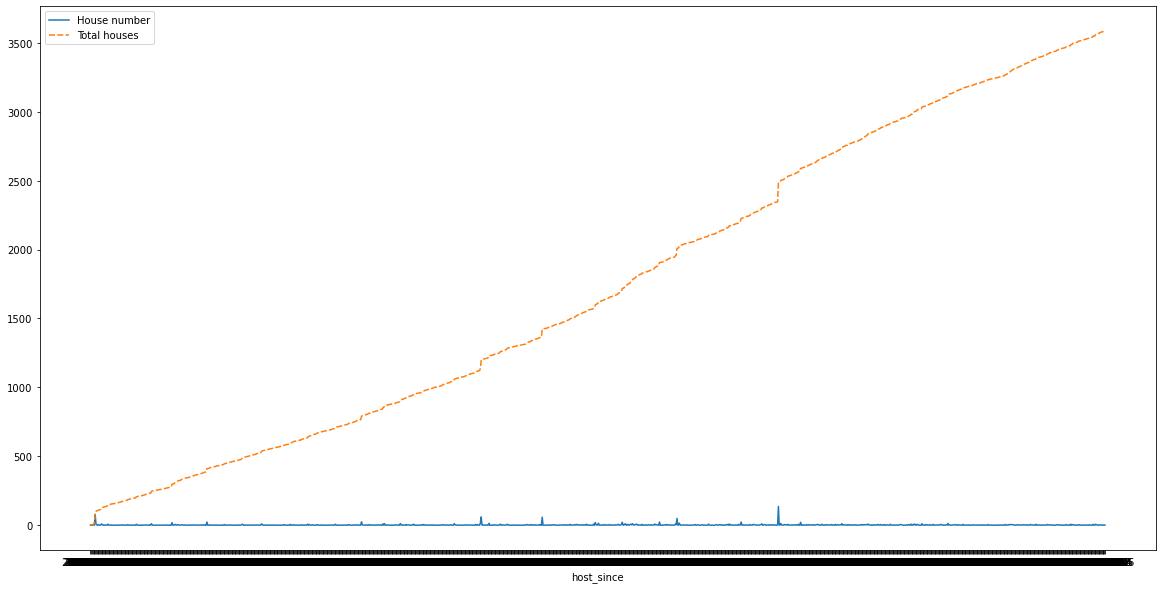

In [48]:
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(data=hostsJoince)

from the chart above it's show how the number houses in boston increases over the years and in some data which was in 2015 there were the highest icrease in number of houses arround the hosts.

In [74]:
# adding the year and month to the data from the column host_since
listings['host_since_YM'] = pd.to_datetime(listings['host_since'] ,errors = 'coerce',format = '%Y-%m-%d').dt.to_period('M')

# the method below will take the column name and the data to return new datafrane that contains host joince in format month and year, neighbourhood_cleansed and C listings 
def eighbourhood_lists(columnName,listings):
    column_list = listings.groupby(['host_since_YM',columnName]).count()[['id']]
    column_list.reset_index(inplace=True)
    column_list = column_list.sort_values(by=[columnName,'host_since_YM'])
    column_list['cumnum'] = column_list.groupby(by=[columnName])['id'].apply(lambda x: x.cumsum())
    column_list.drop(['id'],inplace=True,axis=1)
    column_list_w = column_list.pivot('host_since_YM', columnName)
    column_list_w = column_list_w.fillna(method='ffill')
    column_list_w = column_list_w.fillna(0)
    column_list_w.rename(columns=lambda x: 'col_'+x, inplace=True)
    column_list_w.reset_index(inplace=True)
    column_list_w_clean = column_list_w['col_cumnum']
    column_list_w_clean['host_since_YM'] = column_list_w['host_since_YM']
    column_list_WL = column_list_w_clean.melt('host_since_YM', var_name='cols',  value_name='vals')
    column_list_WL = column_list_WL.rename(columns={"cols": columnName, "vals": "C listings"})

    return column_list_WL

neighbor_lists = eighbourhood_lists('neighbourhood_cleansed',listings)
neighbor_lists.head()

,host_since_YM,neighbourhood_cleansed,C listings
0,2008-11,col_Allston,2.0
1,2008-12,col_Allston,2.0
2,2009-02,col_Allston,2.0
3,2009-05,col_Allston,2.0
4,2009-07,col_Allston,2.0


/var/folders/pj/72chqrfx3t32qkh306c9w6rm0000gn/T/ipykernel_53591/215340941.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  g=g.set_xticklabels(neighbor_lists.host_since_YM.unique(),rotation=90)


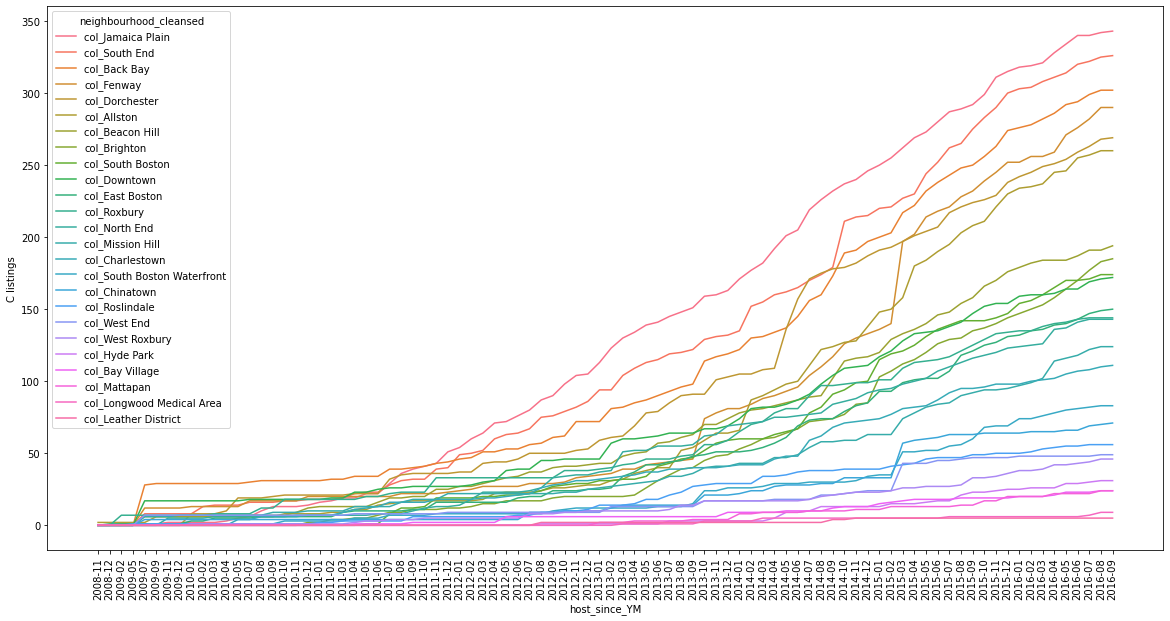

In [67]:
f, ax = plt.subplots(figsize=(20, 10))
neighbor_lists['host_since_YM'] = neighbor_lists['host_since_YM'].apply(lambda x:str(x))# convert each value to str
last_date = neighbor_lists[neighbor_lists.host_since_YM==max(neighbor_lists.host_since_YM)]
hue_order = last_date.sort_values(by=['C listings'],ascending=False)['neighbourhood_cleansed']
g=sns.lineplot(x='host_since_YM',y='C listings',hue='neighbourhood_cleansed', hue_order =hue_order ,
               data=neighbor_lists)
g=g.set_xticklabels(neighbor_lists.host_since_YM.unique(),rotation=90)

From The chart above it shows that how each neighbourhood has grow over the the months of the data in boston and from that we can notice the highest neighbourhood was Jamaica Plain 

### Q3

In [80]:
neig = listings.groupby('neighbourhood_cleansed').aggregate(['sum','mean'])

In [106]:
values = neig[['number_of_reviews', 'review_scores_rating']]


In [125]:
list(values.review_scores_rating['mean'])

[90.16483516483517,
 91.53164556962025,
 93.0,
 93.37869822485207,
 90.86466165413533,
 93.69736842105263,
 92.1219512195122,
 89.28,
 92.4322033898305,
 90.2720588235294,
 89.41711229946524,
 92.28,
 94.1593220338983,
 98.33333333333333,
 94.0,
 91.0,
 87.6951219512195,
 93.725,
 95.38,
 89.80341880341881,
 93.98039215686275,
 94.43103448275862,
 93.26492537313433,
 90.33333333333333,
 95.21212121212122]

In [121]:
list(neig.reset_index().neighbourhood_cleansed)

['Allston',
 'Back Bay',
 'Bay Village',
 'Beacon Hill',
 'Brighton',
 'Charlestown',
 'Chinatown',
 'Dorchester',
 'Downtown',
 'East Boston',
 'Fenway',
 'Hyde Park',
 'Jamaica Plain',
 'Leather District',
 'Longwood Medical Area',
 'Mattapan',
 'Mission Hill',
 'North End',
 'Roslindale',
 'Roxbury',
 'South Boston',
 'South Boston Waterfront',
 'South End',
 'West End',
 'West Roxbury']

In [133]:
df1 = pd.DataFrame(
{'Neighbourhood': ['Allston',
 'Back Bay',
 'Bay Village',
 'Beacon Hill',
 'Brighton',
 'Charlestown',
 'Chinatown',
 'Dorchester',
 'Downtown',
 'East Boston',
 'Fenway',
 'Hyde Park',
 'Jamaica Plain',
 'Leather District',
 'Longwood Medical Area',
 'Mattapan',
 'Mission Hill',
 'North End',
 'Roslindale',
 'Roxbury',
 'South Boston',
 'South Boston Waterfront',
 'South End',
 'West End',
 'West Roxbury'], 'number_of_reviews SUM':[2988,
 4389,
 241,
 4098,
 3052,
 1981,
 669,
 7396,
 2535,
 5504,
 2817,
 376,
 9055,
 69,
 393,
 442,
 1469,
 4483,
 1387,
 3775,
 3851,
 744,
 5714,
 157,
 690],'review_scores_rating Mean':[90.16483516483517,
 91.53164556962025,
 93.0,
 93.37869822485207,
 90.86466165413533,
 93.69736842105263,
 92.1219512195122,
 89.28,
 92.4322033898305,
 90.2720588235294,
 89.41711229946524,
 92.28,
 94.1593220338983,
 98.33333333333333,
 94.0,
 91.0,
 87.6951219512195,
 93.725,
 95.38,
 89.80341880341881,
 93.98039215686275,
 94.43103448275862,
 93.26492537313433,
 90.33333333333333,
 95.21212121212122]})
df1 = df1.set_index('Neighbourhood')
df1

,number_of_reviews SUM,review_scores_rating Mean
Neighbourhood,,
Allston,2988,90.164835
Back Bay,4389,91.531646
Bay Village,241,93.000000
Beacon Hill,4098,93.378698
Brighton,3052,90.864662
Charlestown,1981,93.697368
Chinatown,669,92.121951
Dorchester,7396,89.280000
Downtown,2535,92.432203


<AxesSubplot:xlabel='Neighbourhood'>

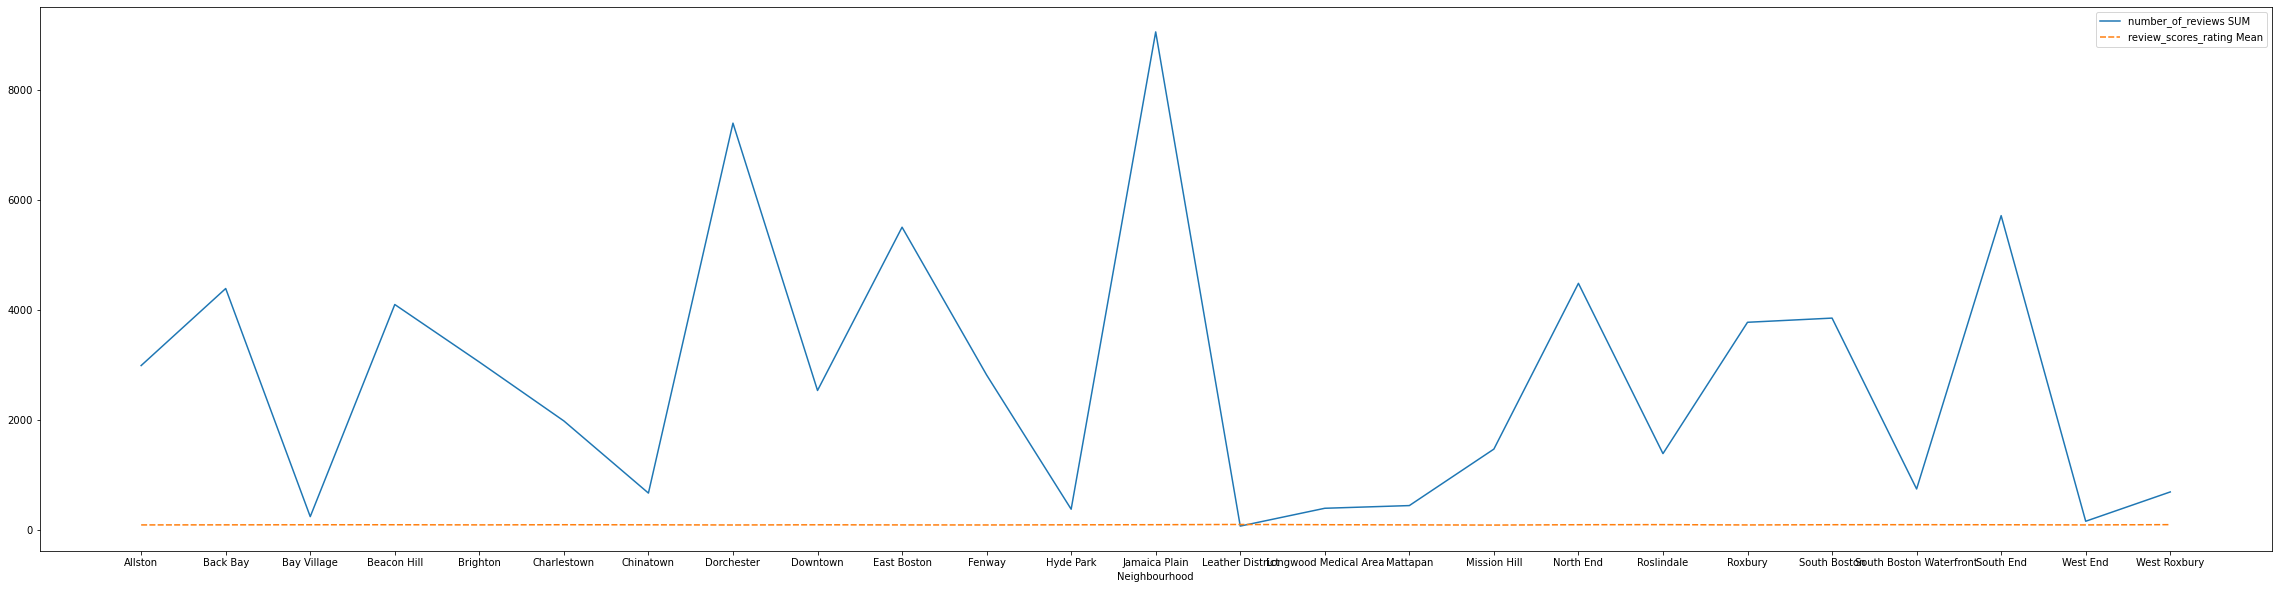

In [136]:
f, ax = plt.subplots(figsize=(40, 10))
sns.lineplot(data=df1)

<AxesSubplot:xlabel='Neighbourhood', ylabel='review_scores_rating Mean'>

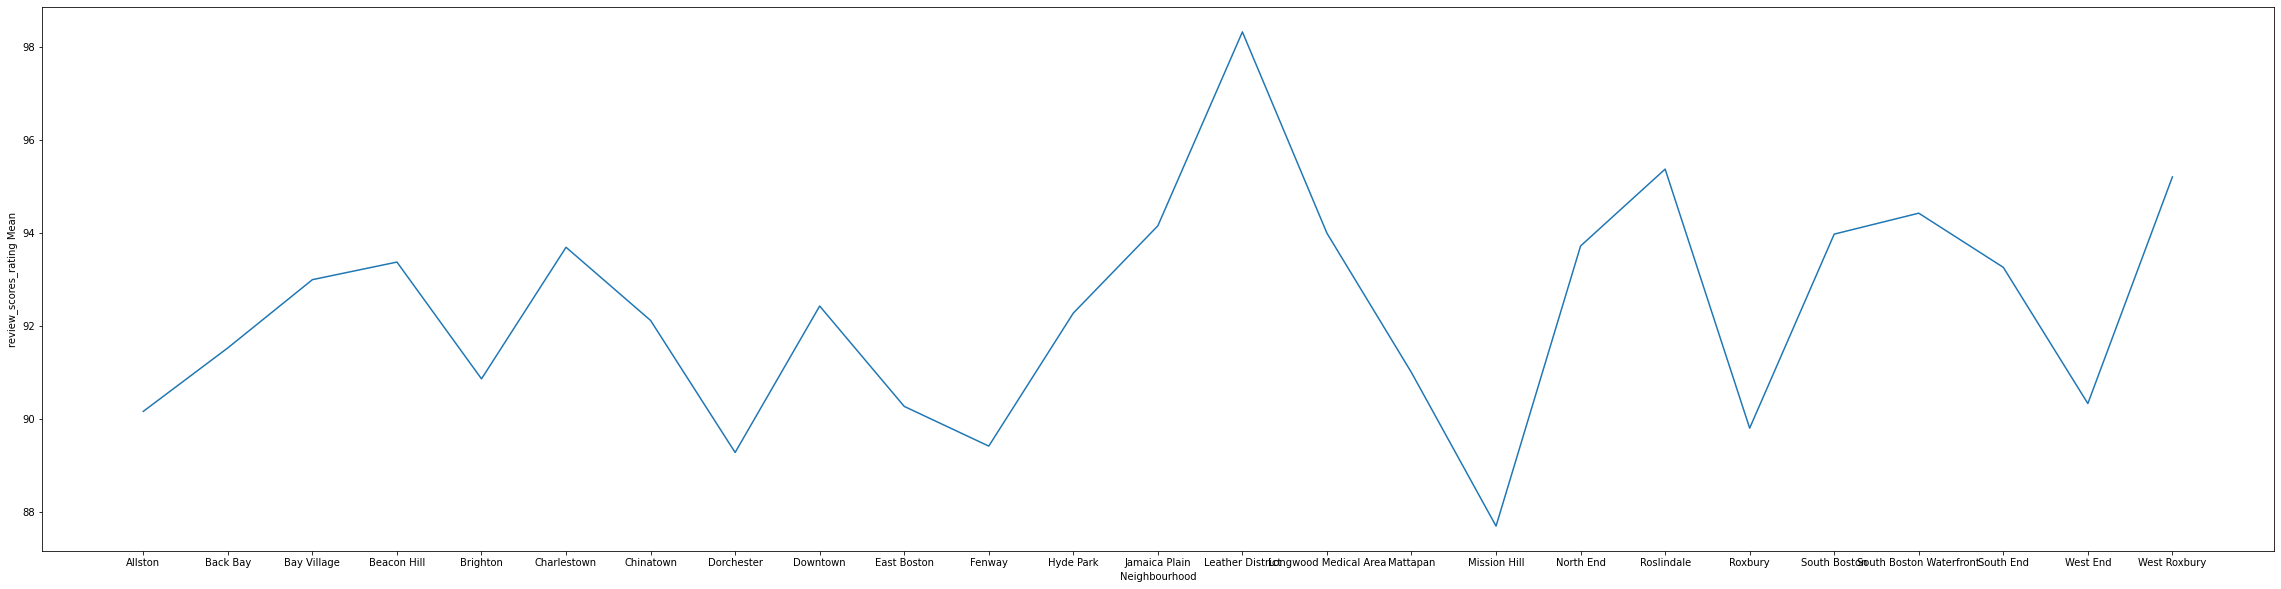

In [138]:
f, ax = plt.subplots(figsize=(40, 10))
sns.lineplot(data=df1['review_scores_rating Mean'])

From the graph above it's shows that huge different in number of reviews and with that it's effict the score and in some points such as Leather Distrue it's do the oppisite which less number of reviews has huge influne on the score rate 